
--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8374 entries, 0 to 8373
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    8374 non-null   object 
 1   Component_ID                8374 non-null   object 
 2   Vendor_ID                   8374 non-null   object 
 3   Route_ID                    8374 non-null   object 
 4   Order_Date                  8374 non-null   object 
 5   Contractual_Delivery_Date   8374 non-null   object 
 6   Actual_Delivery_Date        8374 non-null   object 
 7   Delivered_Qty               8374 non-null   int64  
 8   Ordered_Qty                 8374 non-null   int64  
 9   Price_per_Unit              8374 non-null   float64
 10  Committed_Lead_Days         8374 non-null   int64  
 11  Actual_Lead_Days            8374 non-null   int64  
 12  Shortfall                   8374 non-null   int64  
 13  Shortfall_f

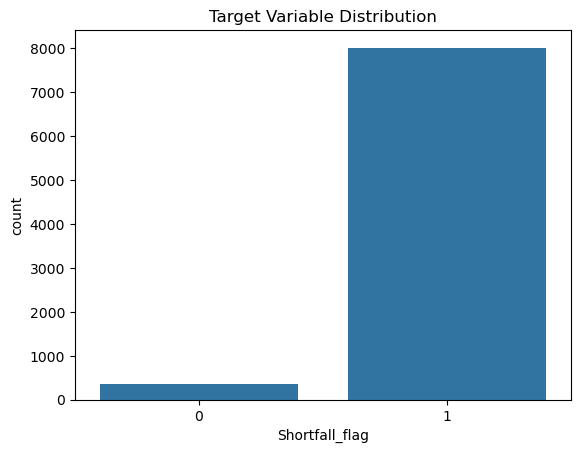

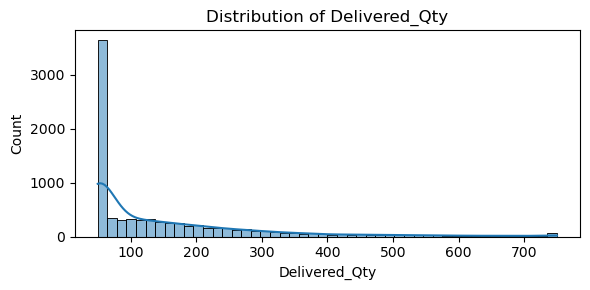

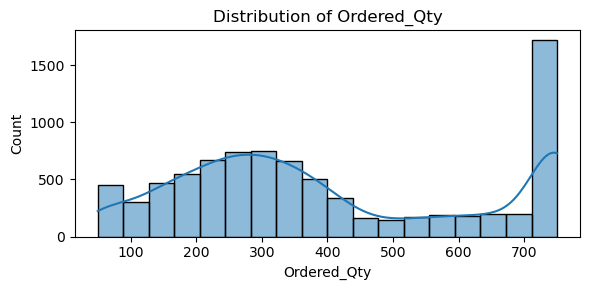

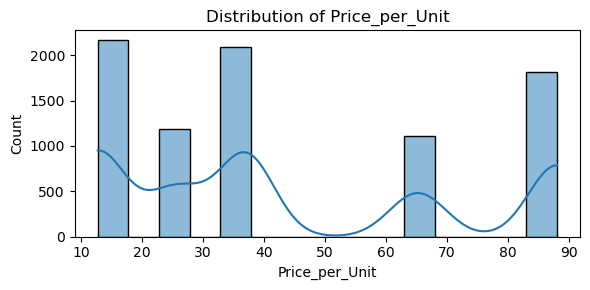

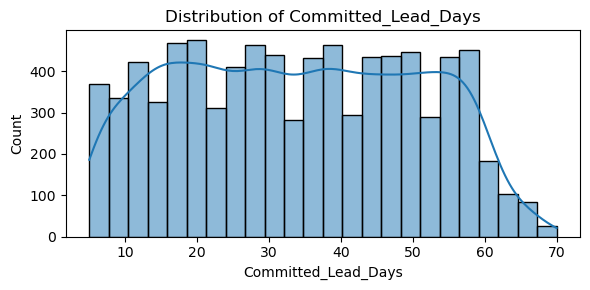

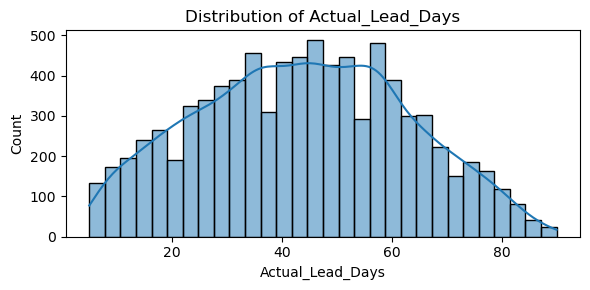

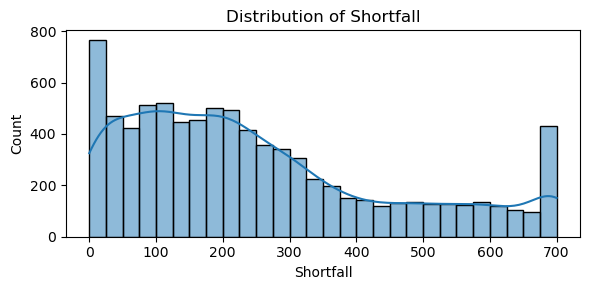

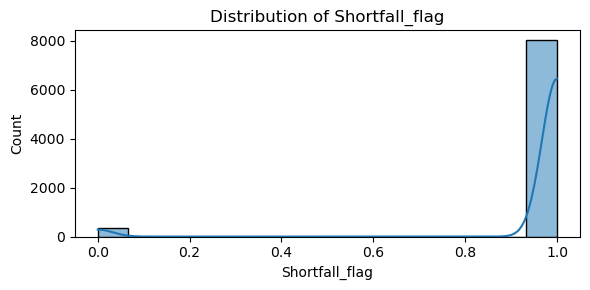

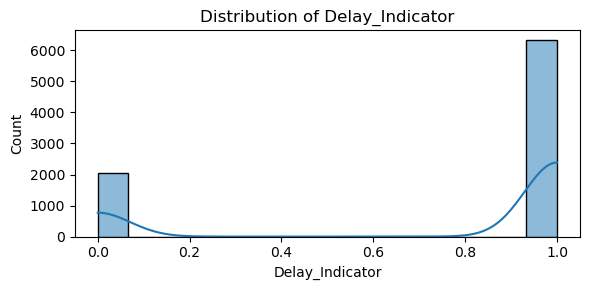

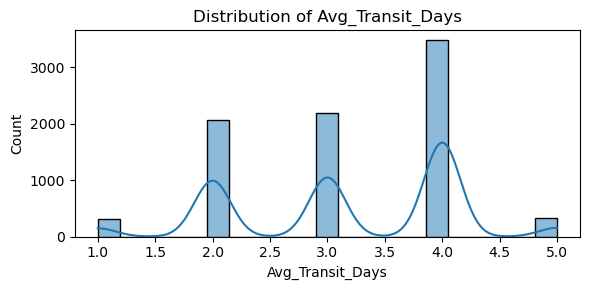

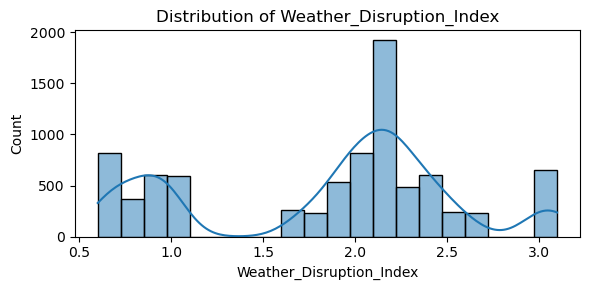

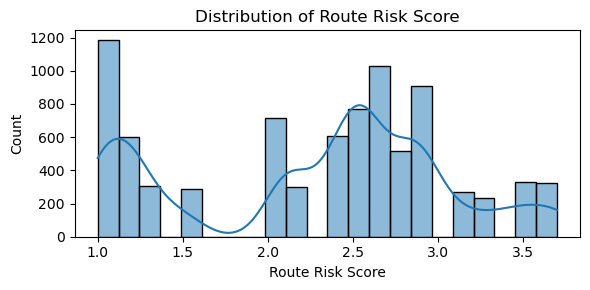

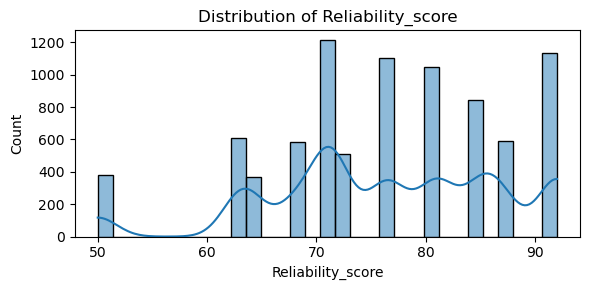

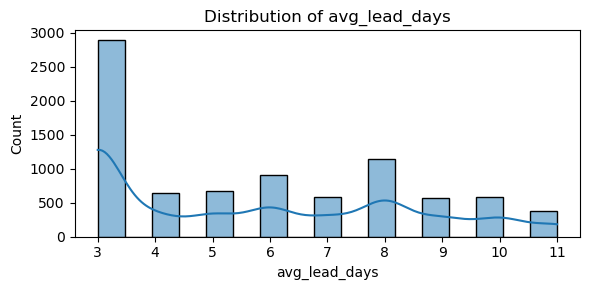

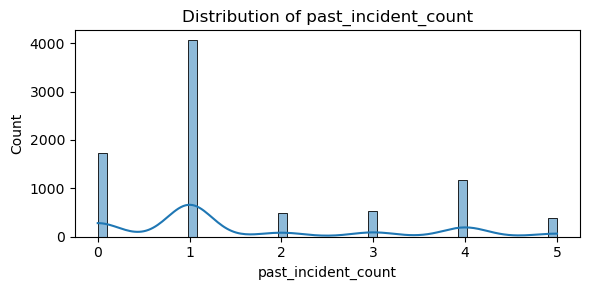

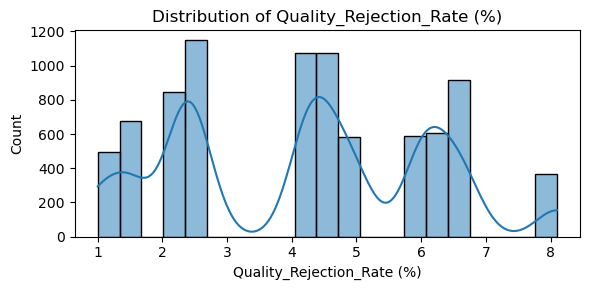

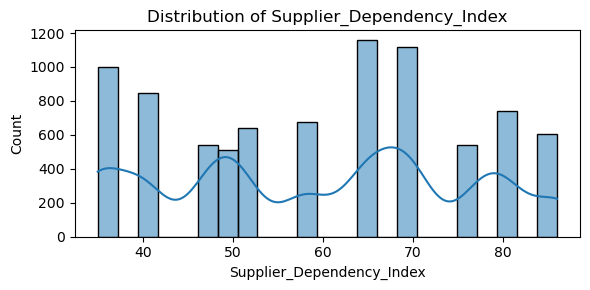

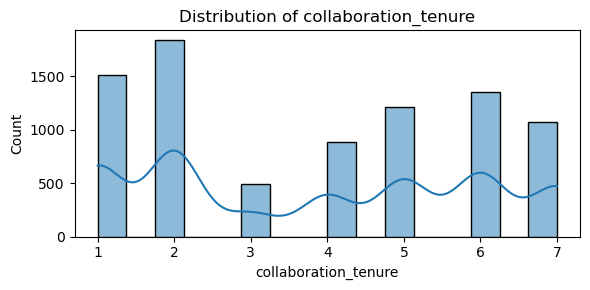

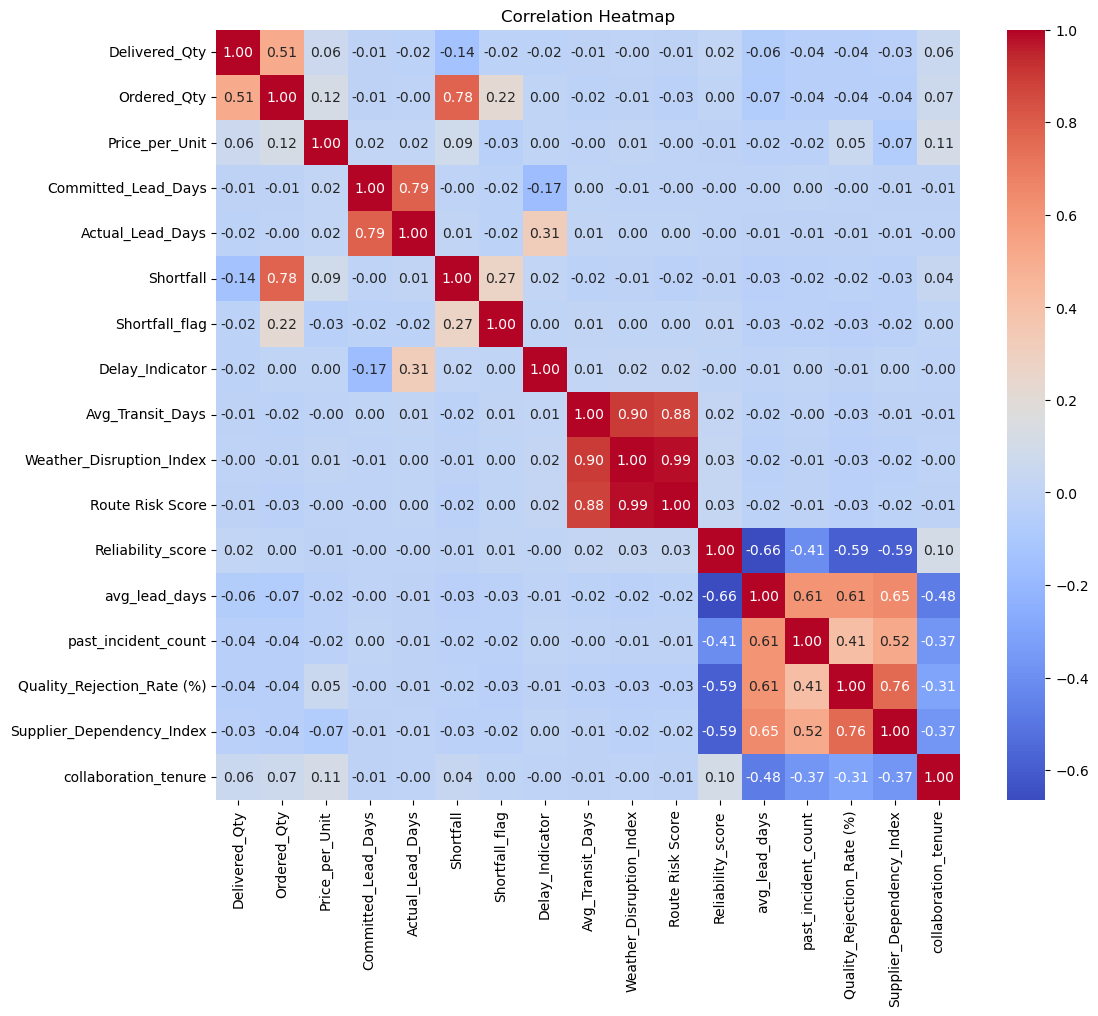

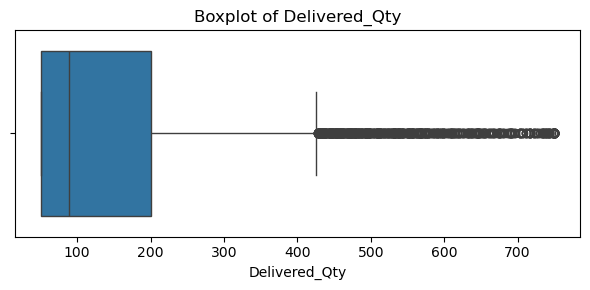

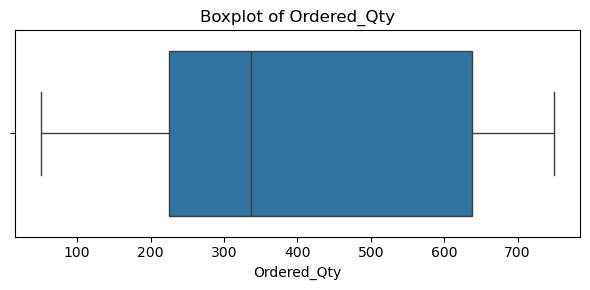

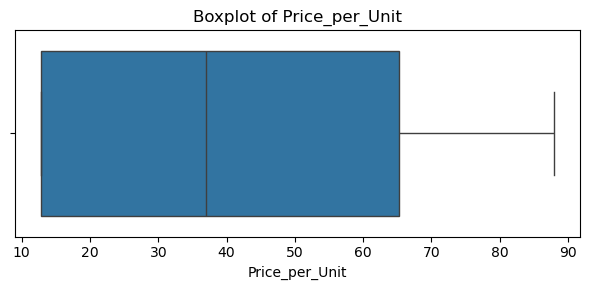

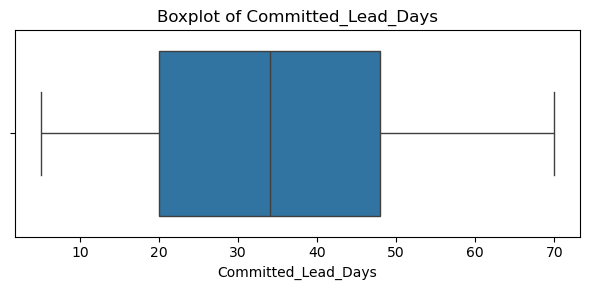

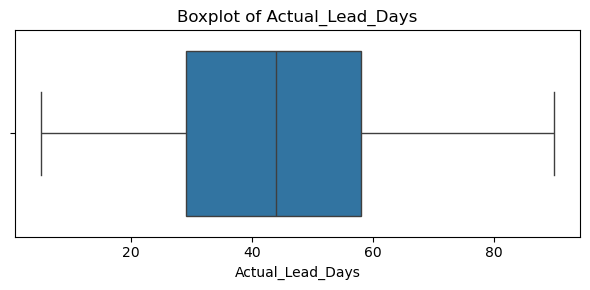

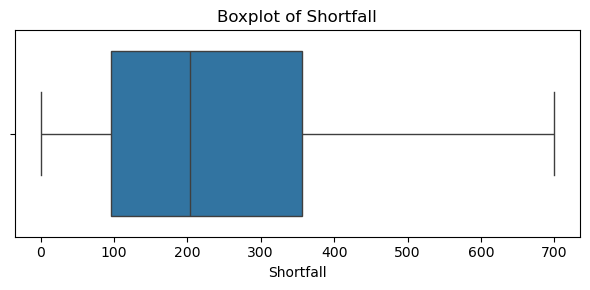

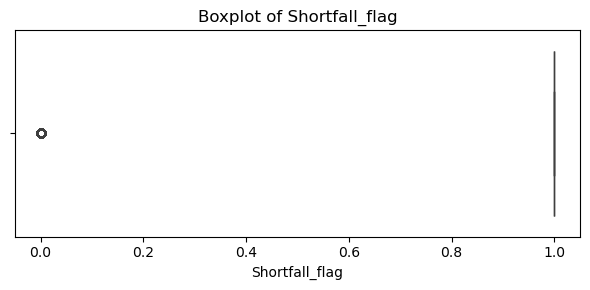

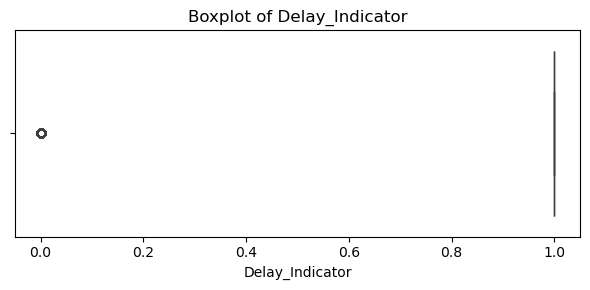

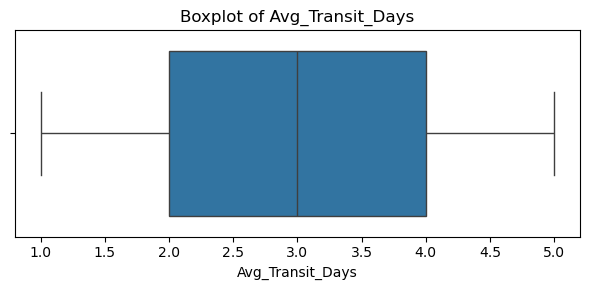

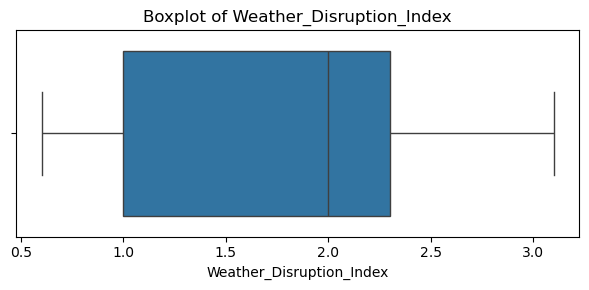

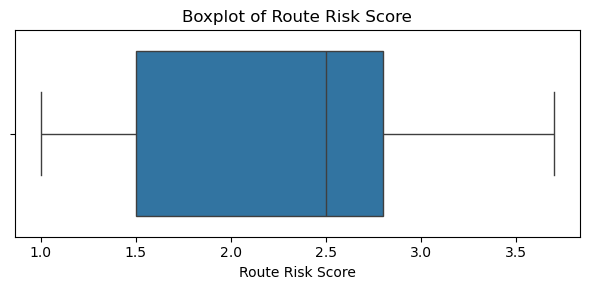

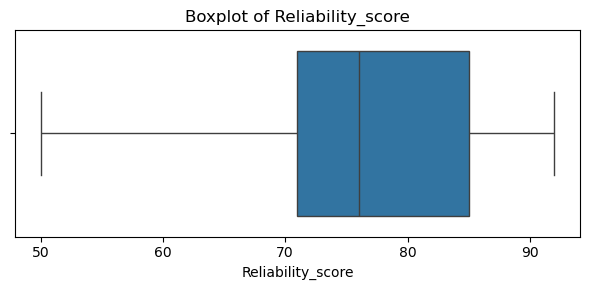

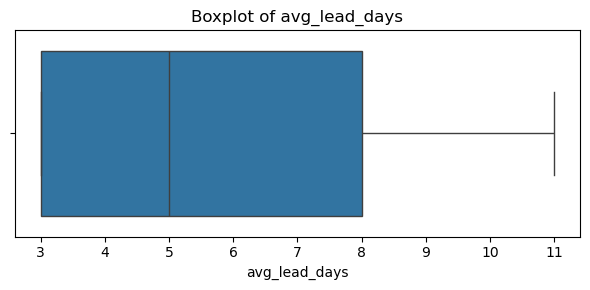

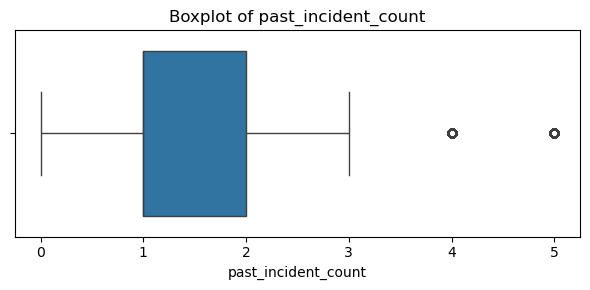

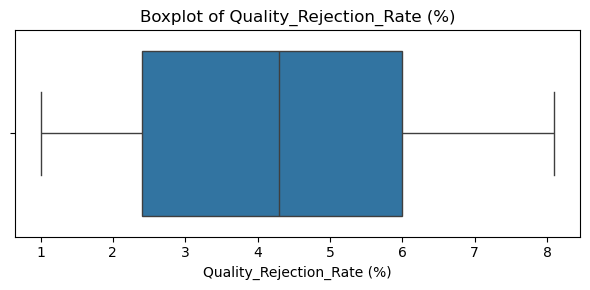

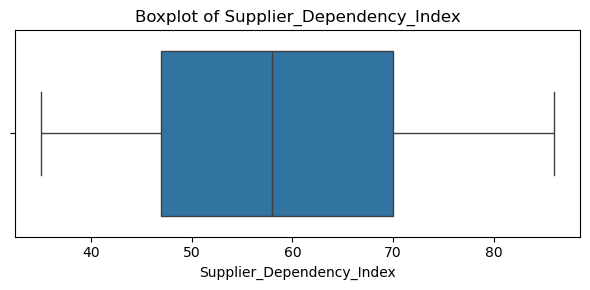

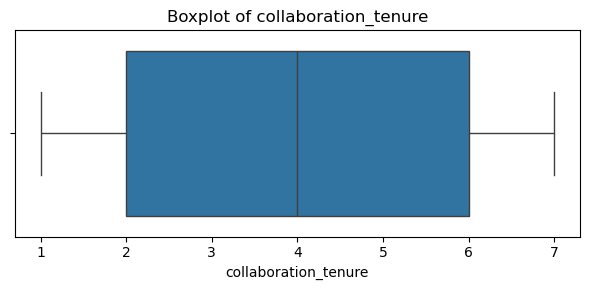

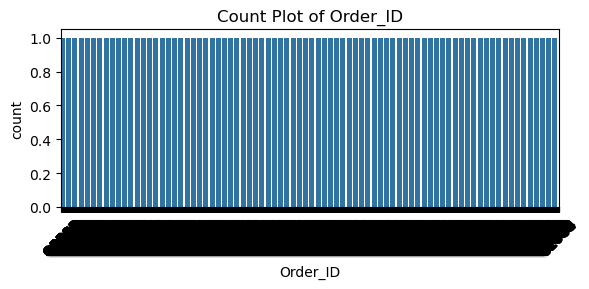

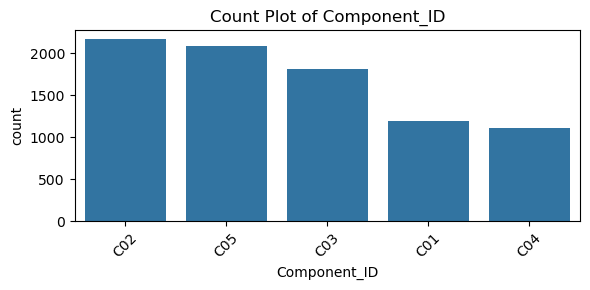

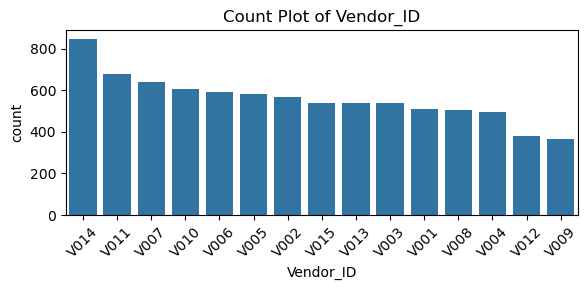

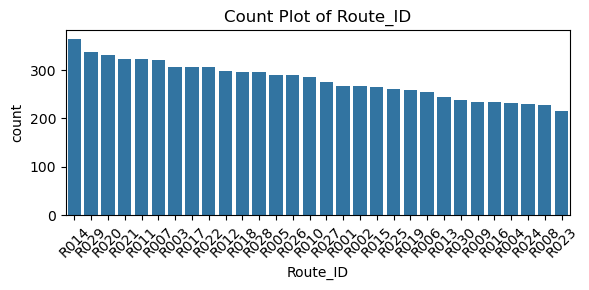

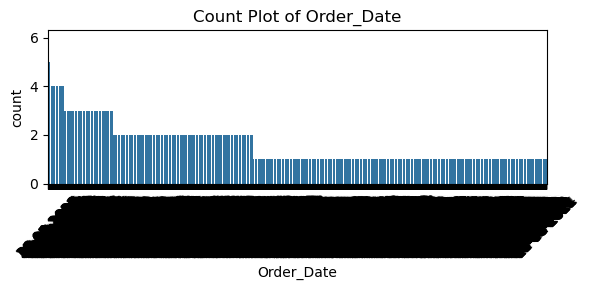

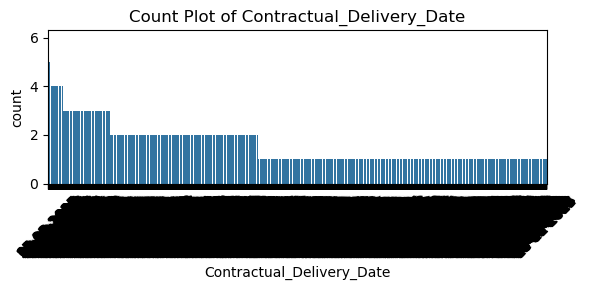

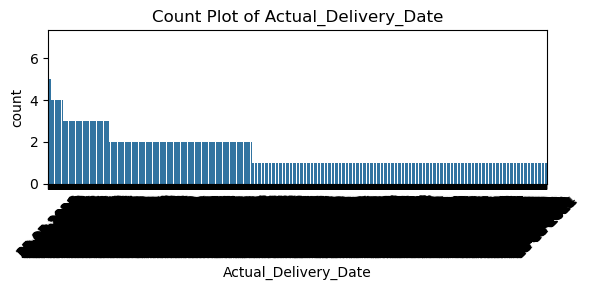

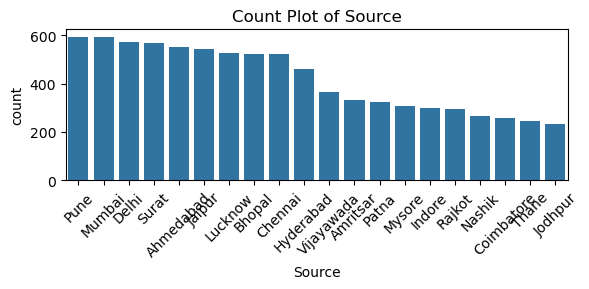

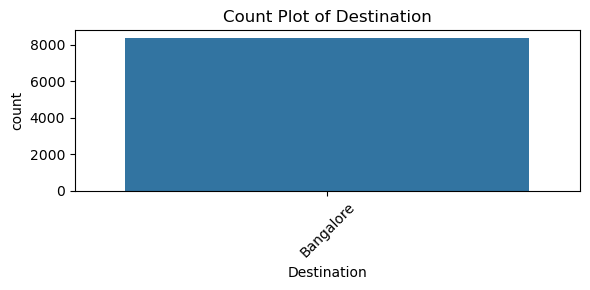

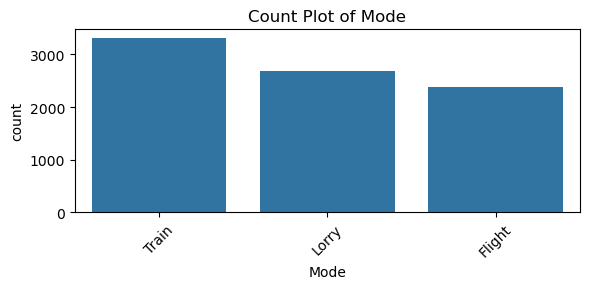

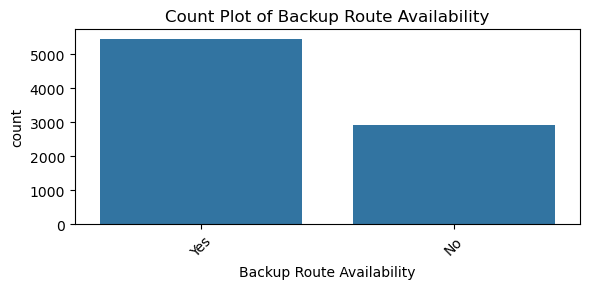

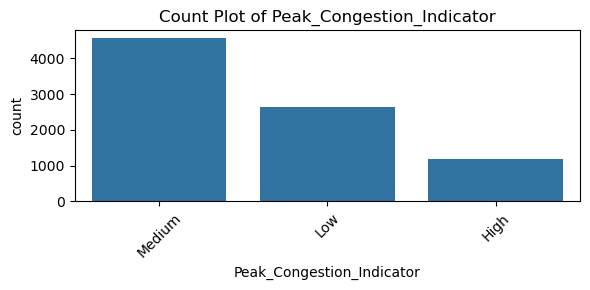

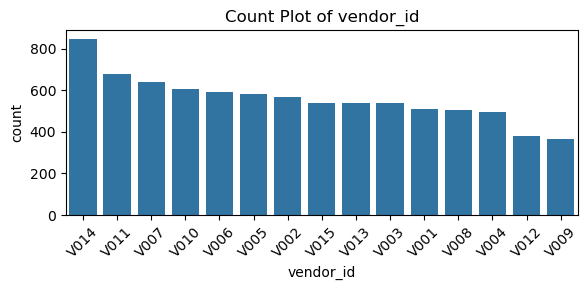

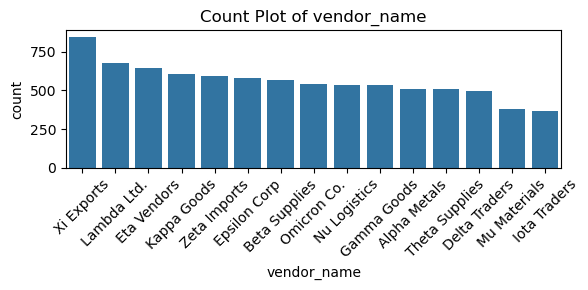

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def load_data(path):
    df = pd.read_csv(path)
    return df

def basic_info(df):
    print("\n--- Dataset Info ---")
    df.info()
    print("\n--- First 5 Rows ---")
    print(df.head())

def summary_statistics(df):
    print("\n--- Summary Statistics ---")
    print(df.describe(include='all'))

def check_missing_values(df):
    print("\n--- Missing Values ---")
    print(df.isnull().sum())

def target_distribution(df, target_col):
    if target_col in df.columns:
        print("\n--- Target Class Distribution ---")
        print(df[target_col].value_counts())
        sns.countplot(data=df, x=target_col)
        plt.title("Target Variable Distribution")
        plt.show()

def plot_numerical_distributions(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        plt.figure(figsize=(6, 3))
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.tight_layout()
        plt.show()

def plot_correlation_heatmap(df):
    plt.figure(figsize=(12, 10))
    sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()

def plot_boxplots(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        plt.figure(figsize=(6, 3))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.tight_layout()
        plt.show()

def plot_categorical_distributions(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        plt.figure(figsize=(6, 3))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f"Count Plot of {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

def run_eda(file_path, target_col='Shortfall_flag'):
    df = load_data(file_path)
    basic_info(df)
    summary_statistics(df)
    check_missing_values(df)
    target_distribution(df, target_col)
    plot_numerical_distributions(df)
    plot_correlation_heatmap(df)
    plot_boxplots(df)
    plot_categorical_distributions(df)

# === Run EDA ===
if __name__ == '__main__':
    run_eda("full_merged_data_v1.csv")

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Load Dataset ===
df = pd.read_csv("full_merged_data_v1.csv")

# === Basic Info ===
print("\n--- Dataset Info ---")
df.info()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8374 entries, 0 to 8373
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    8374 non-null   object 
 1   Component_ID                8374 non-null   object 
 2   Vendor_ID                   8374 non-null   object 
 3   Route_ID                    8374 non-null   object 
 4   Order_Date                  8374 non-null   object 
 5   Contractual_Delivery_Date   8374 non-null   object 
 6   Actual_Delivery_Date        8374 non-null   object 
 7   Delivered_Qty               8374 non-null   int64  
 8   Ordered_Qty                 8374 non-null   int64  
 9   Price_per_Unit              8374 non-null   float64
 10  Committed_Lead_Days         8374 non-null   int64  
 11  Actual_Lead_Days            8374 non-null   int64  
 12  Shortfall                   8374 non-null   int64  
 13  Shortfall_f

In [5]:
print("\n--- First 5 Rows ---")
print(df.head())


--- First 5 Rows ---
  Order_ID Component_ID Vendor_ID Route_ID  Order_Date  \
0    O0001          C04      V009     R002  03-11-2001   
1    O0002          C01      V001     R022  10-11-2001   
2    O0003          C05      V001     R021  11-11-2001   
3    O0004          C01      V012     R014  11-11-2001   
4    O0005          C02      V002     R007  14-11-2001   

  Contractual_Delivery_Date Actual_Delivery_Date  Delivered_Qty  Ordered_Qty  \
0                01-01-2002           25-01-2002             50          580   
1                11-01-2002           07-01-2002             50          317   
2                01-01-2002           30-01-2002            124          140   
3                05-01-2002           23-01-2002             50           50   
4                06-01-2002           27-01-2002             50          362   

   Price_per_Unit  ...  Backup Route Availability  Peak_Congestion_Indicator  \
0           65.20  ...                        Yes                   

In [7]:
# === Summary Statistics ===
print("\n--- Summary Statistics ---")
print(df.describe(include='all'))


--- Summary Statistics ---
       Order_ID Component_ID Vendor_ID Route_ID  Order_Date  \
count      8374         8374      8374     8374        8374   
unique     8374            5        15       30        5297   
top       O0001          C02      V014     R014  24-04-2020   
freq          1         2166       845      364           6   
mean        NaN          NaN       NaN      NaN         NaN   
std         NaN          NaN       NaN      NaN         NaN   
min         NaN          NaN       NaN      NaN         NaN   
25%         NaN          NaN       NaN      NaN         NaN   
50%         NaN          NaN       NaN      NaN         NaN   
75%         NaN          NaN       NaN      NaN         NaN   
max         NaN          NaN       NaN      NaN         NaN   

       Contractual_Delivery_Date Actual_Delivery_Date  Delivered_Qty  \
count                       8374                 8374    8374.000000   
unique                      5301                 5340            NaN   

In [9]:
# === Check Missing Values ===
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
Order_ID                      0
Component_ID                  0
Vendor_ID                     0
Route_ID                      0
Order_Date                    0
Contractual_Delivery_Date     0
Actual_Delivery_Date          0
Delivered_Qty                 0
Ordered_Qty                   0
Price_per_Unit                0
Committed_Lead_Days           0
Actual_Lead_Days              0
Shortfall                     0
Shortfall_flag                0
Delay_Indicator               0
Source                        0
Destination                   0
Mode                          0
Avg_Transit_Days              0
Weather_Disruption_Index      0
Route Risk Score              0
Backup Route Availability     0
Peak_Congestion_Indicator     0
vendor_id                     0
vendor_name                   0
Reliability_score             0
avg_lead_days                 0
past_incident_count           0
Quality_Rejection_Rate (%)    0
Supplier_Dependency_Index     0
collaboration_te


--- Target Class Distribution ---
Shortfall_flag
1    8020
0     354
Name: count, dtype: int64


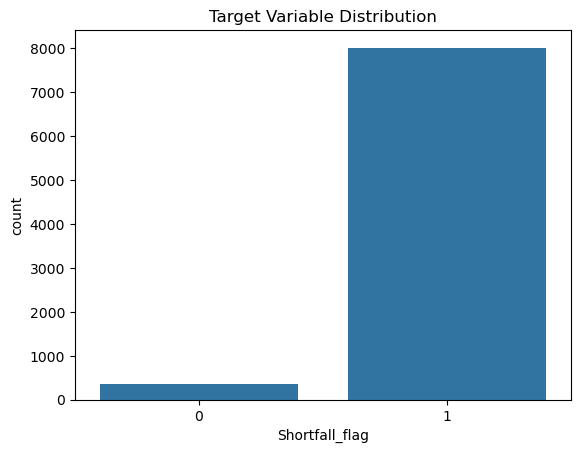

In [11]:
# === Class Distribution ===
if 'Shortfall_flag' in df.columns:
    print("\n--- Target Class Distribution ---")
    print(df['Shortfall_flag'].value_counts())
    sns.countplot(data=df, x='Shortfall_flag')
    plt.title("Target Variable Distribution")
    plt.show()

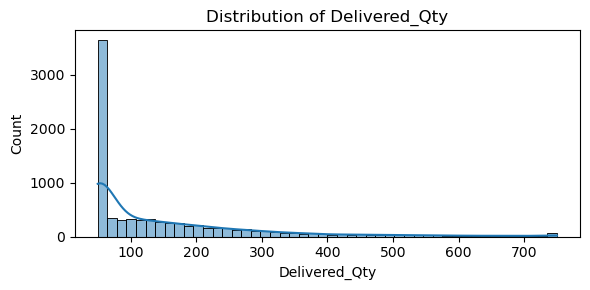

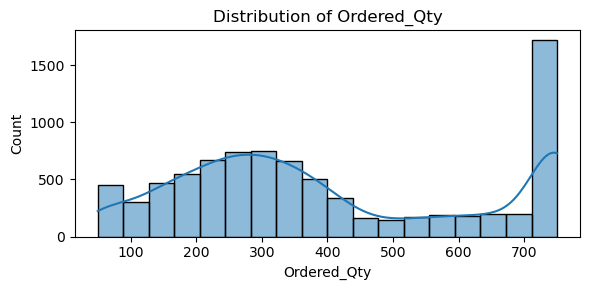

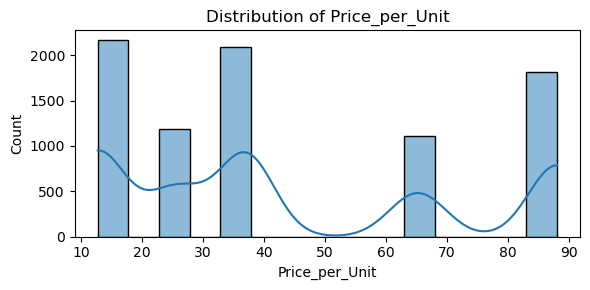

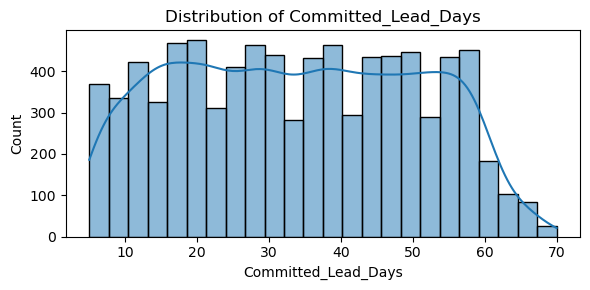

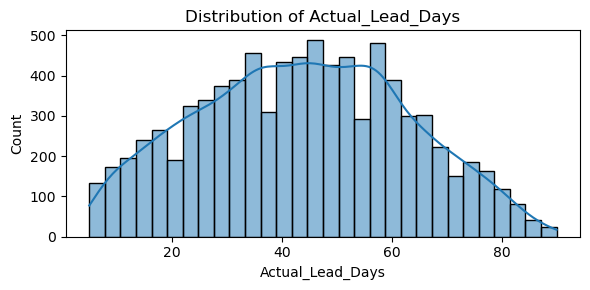

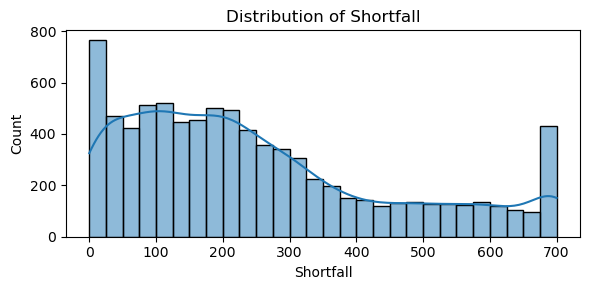

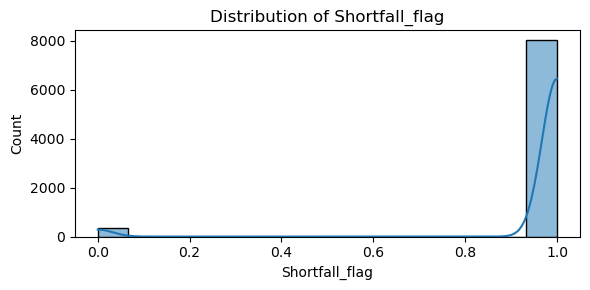

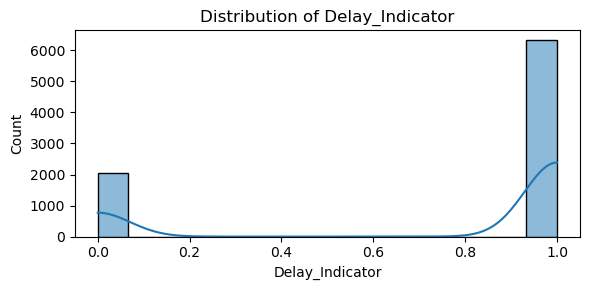

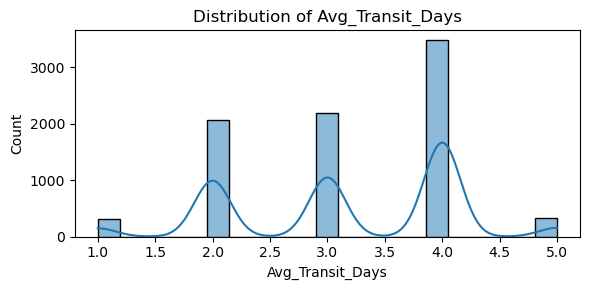

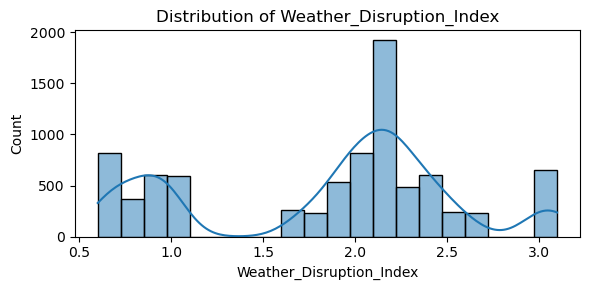

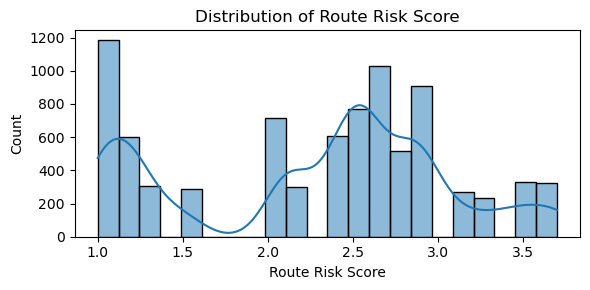

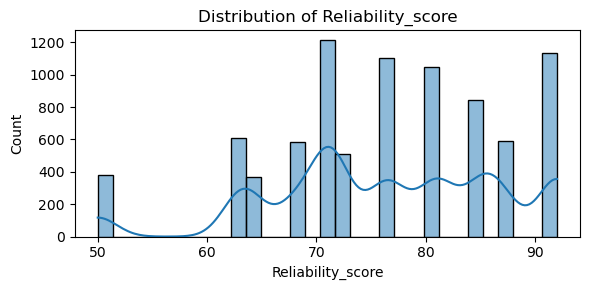

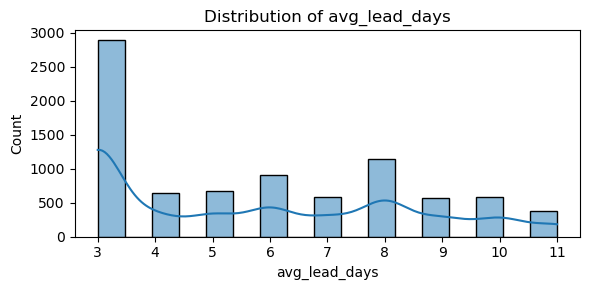

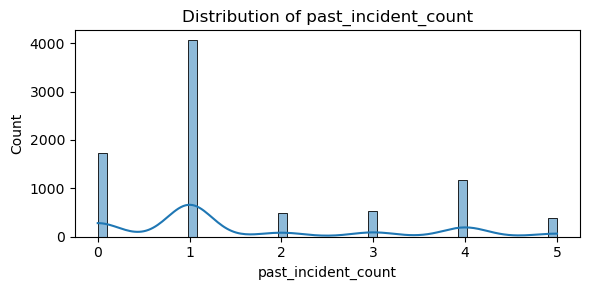

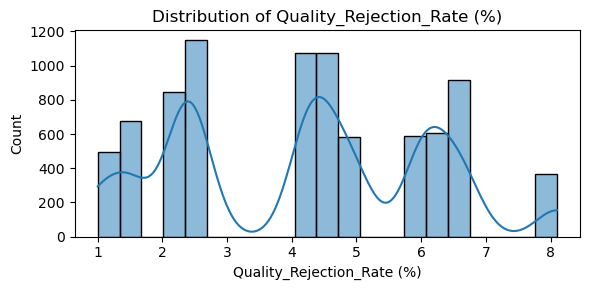

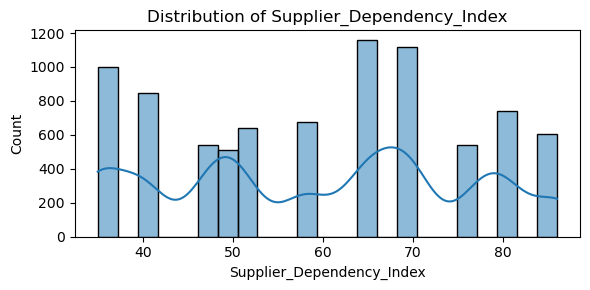

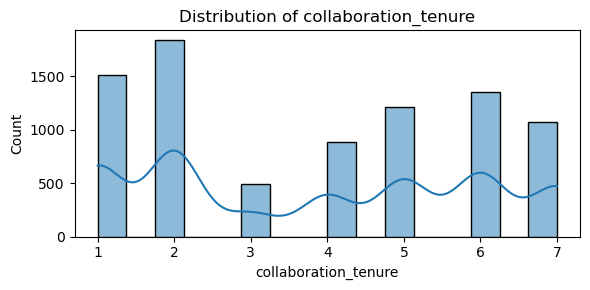

In [13]:
# === Distribution Plots for Numerical Columns ===
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


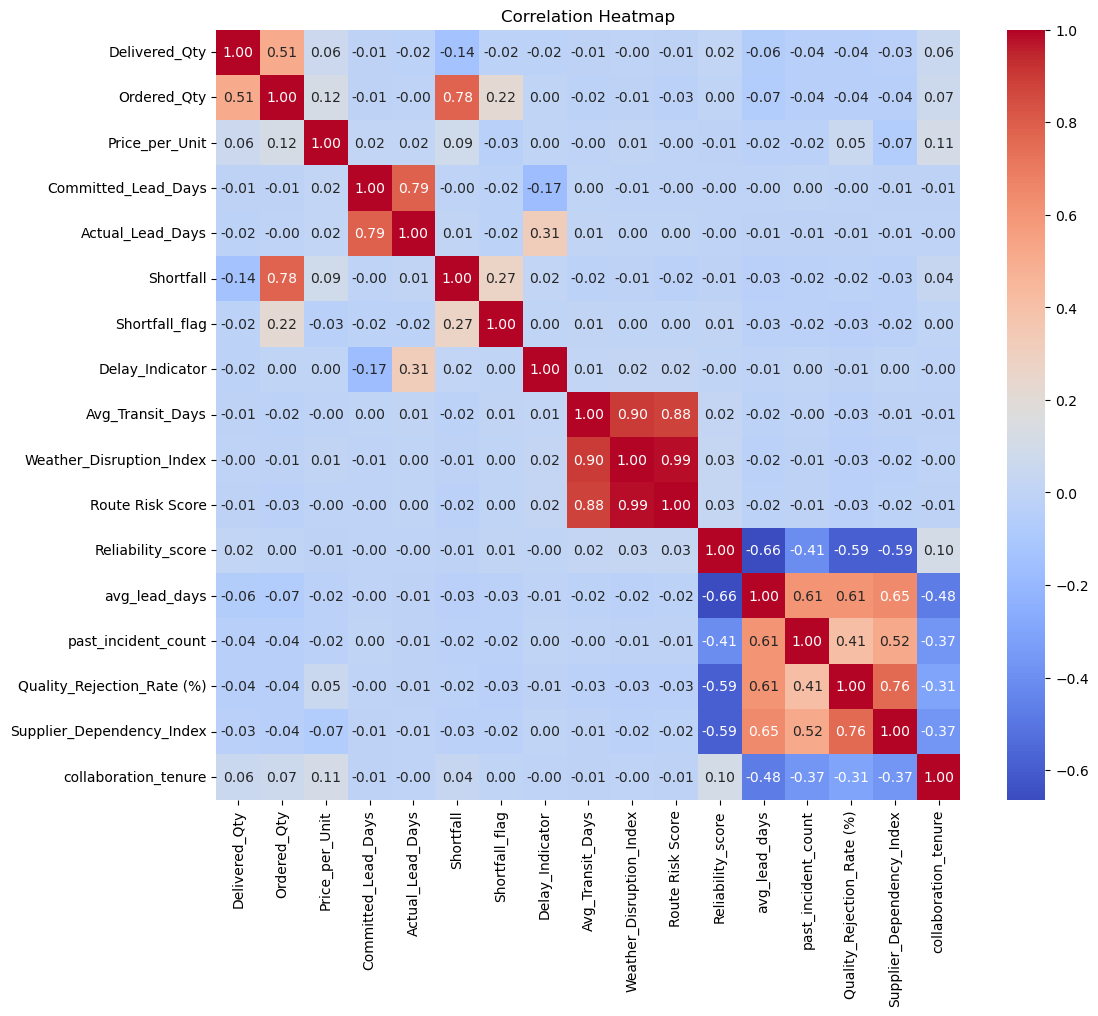

In [15]:
# === Correlation Heatmap ===
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

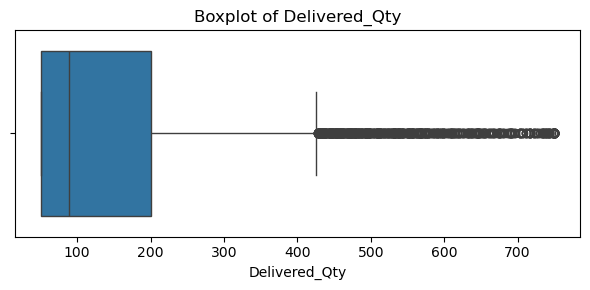

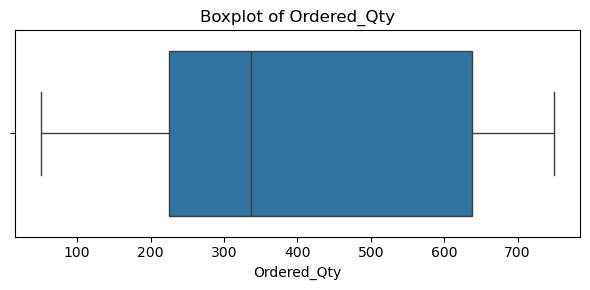

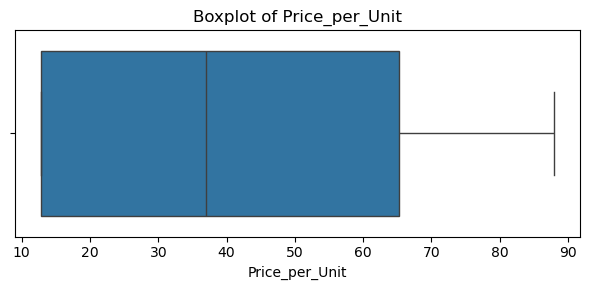

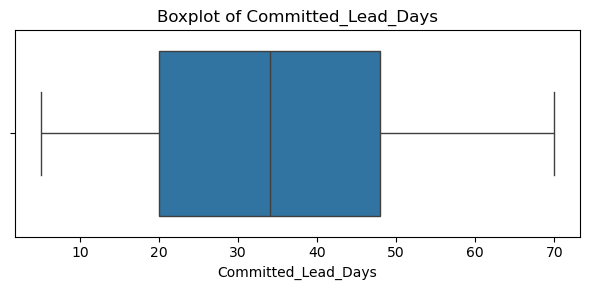

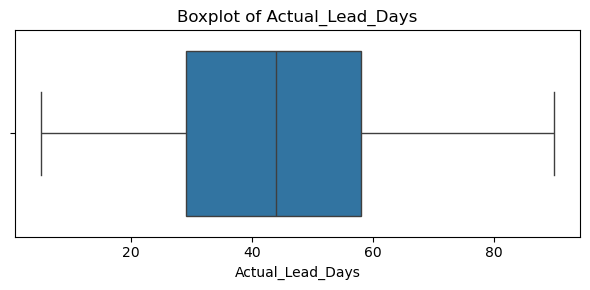

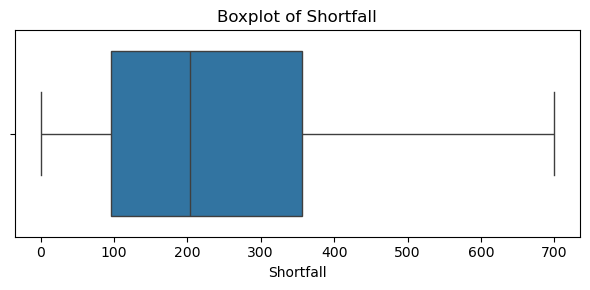

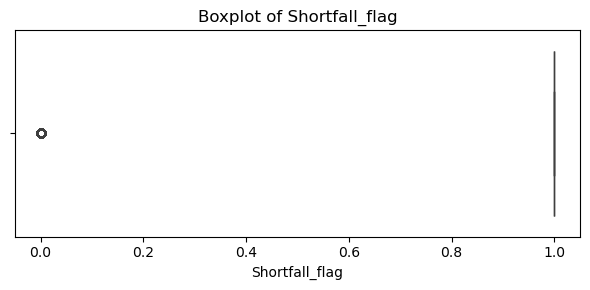

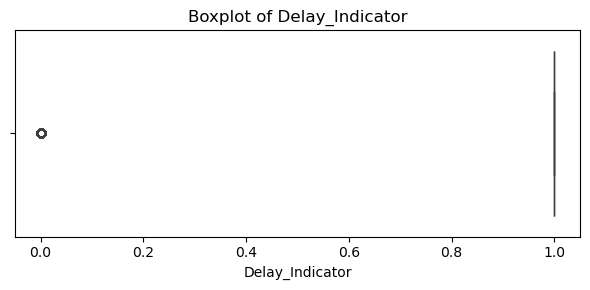

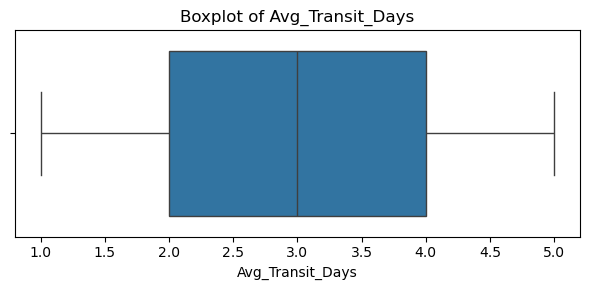

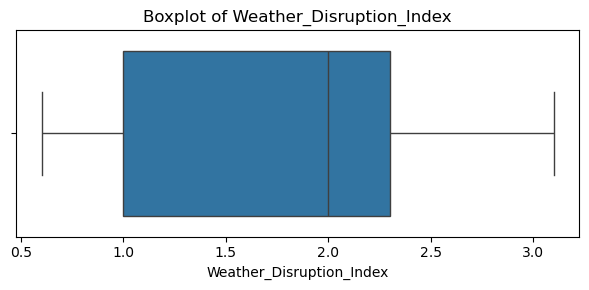

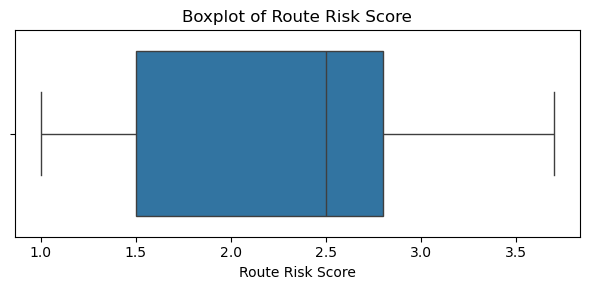

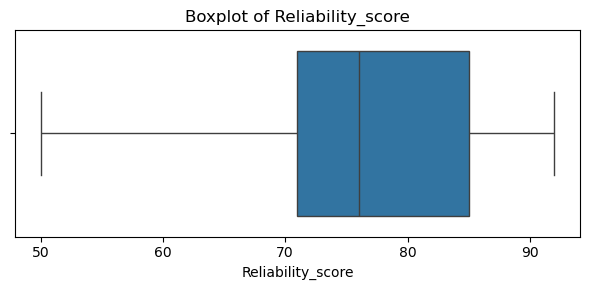

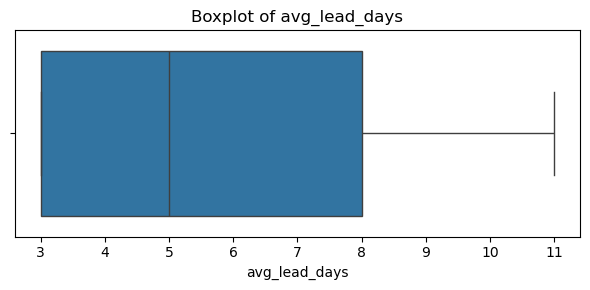

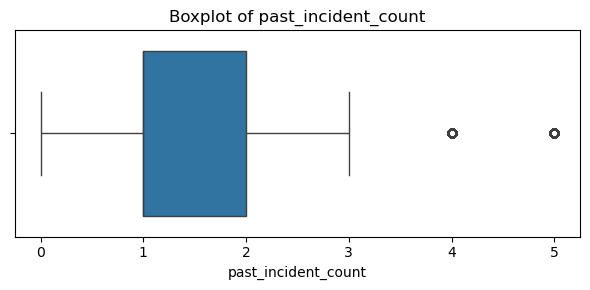

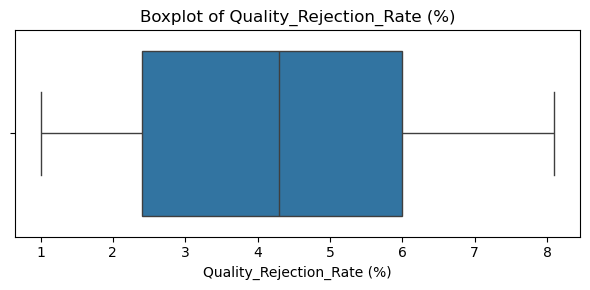

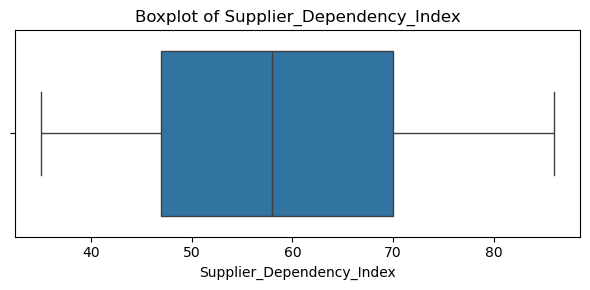

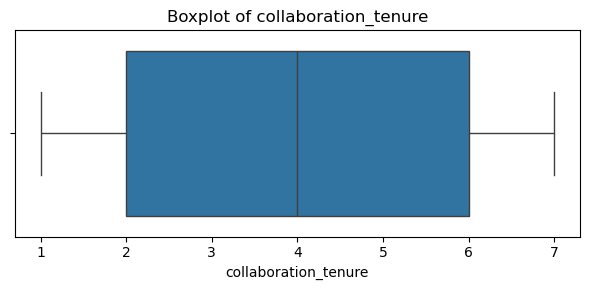

In [17]:
# === Boxplots for Outlier Detection ===
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

In [ ]:
#a little Analysis of my own

In [19]:
# Vendor_Risk
df['Vendor_Risk'] = (1 - df['Reliability_score'] / 100) * df['Quality_Rejection_Rate (%)']

# Order_Pressure
df['Order_Pressure'] = df['Ordered_Qty'] / df['Committed_Lead_Days']

# Transit_Risk
df['Transit_Risk'] = df['Avg_Transit_Days'] * df['Weather_Disruption_Index'] * df['Route Risk Score']
df[['Vendor_Risk', 'Order_Pressure', 'Transit_Risk']].describe()

df['Demand_vs_Reliability'] = df['Ordered_Qty'] / (df['Reliability_score'] + 1)
df['Stress_Score'] = df['Transit_Risk'] * df['Order_Pressure']

df['Low_Order_Pressure'] = (df['Order_Pressure'] < 6.2).astype(int)
df['Low_Stress_Score'] = (df['Stress_Score'] < 40).astype(int)
df['Low_Demand_vs_Reliability'] = (df['Demand_vs_Reliability'] < 3).astype(int)
df['Low_Vendor_Risk'] = (df['Vendor_Risk'] < 0.5).astype(int)

df['Price_per_Unit_vs_Order'] = df['Price_per_Unit'] / (df['Ordered_Qty'] + 1)
df['Collab_Reliability'] = df['collaboration_tenure'] * df['Reliability_score']
df['Low_Price_per_Unit_vs_Order'] = (df['Price_per_Unit_vs_Order'] < 0.05).astype(int)

df[['Vendor_Risk', 'Order_Pressure', 'Transit_Risk','Demand_vs_Reliability','Stress_Score','Price_per_Unit_vs_Order','Collab_Reliability']].describe()


,Vendor_Risk,Order_Pressure,Transit_Risk,Demand_vs_Reliability,Stress_Score,Price_per_Unit_vs_Order,Collab_Reliability
count,8374.000000,8374.000000,8374.000000,8374.000000,8374.000000,8374.000000,8374.000000
mean,1.105561,17.469733,17.490847,5.292629,303.796643,0.173828,293.578099
std,0.868435,19.127457,13.630421,3.140662,474.964130,0.249192,169.406265
min,0.080000,0.735294,1.170000,0.537634,0.860294,0.016977,64.000000
25%,0.435000,6.205929,3.000000,2.905005,39.516499,0.049268,126.000000
50%,0.836000,11.760000,16.380000,4.427700,150.985932,0.096104,276.000000
75%,1.495000,20.600000,24.640000,8.064516,363.434118,0.185755,486.000000
max,3.350000,150.000000,57.350000,14.705882,8602.500000,1.725490,567.000000


In [ ]:
features = ['Vendor_Risk', 'Order_Pressure', 'Transit_Risk']

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

In [ ]:
# Load the dataset
file_path = "full_merged_data_v1.csv"
df = pd.read_csv(file_path)
df.info()
# Get unique values for each column
unique_values_per_column = {col: df[col].unique() for col in df.columns}

# Display only the names of columns and count of unique values to keep it readable here
summary = {col: len(vals) for col, vals in unique_values_per_column.items()}
summary

In [ ]:
# Convert unique values to lists for better readability in output
unique_values_per_column_listed = {col: df[col].unique().tolist() for col in df.columns}

# Return the result
unique_values_per_column_listed